In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')


### Importing External Libraries

import numpy                             as np
import pandas                            as pd
pd.options.mode.chained_assignment = None  # default='warn'


### Importing Matplotlib and Its Style

%matplotlib notebook

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d 

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
##plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


# from scipy.integrate import solve_ivp
# import pyDOE    
# from PCAfold         import PCA          as PCAA

3.8.11 (default, Jun 29 2021, 03:17:05) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


In [2]:
OutputDir    = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/0DReact_Isobaric_10Cases_H2_Sources/')


NVarsRed     = 12

tStratch     = 1.
SOLVER       = 'BDF'

valid_perc   = 20.

FixedMinVal  = 1.e-14

n_ics        = 1


ColorVec     = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

try:
    os.makedirs(OutputDir)
except OSError as e:
    pass
# try:
#     os.makedirs(TestDir)
# except OSError as e:
#     pass

In [3]:
Vars     = []
for iVars in range(1,NVarsRed+1):
    Vars.append('PC_'+str(iVars))
    
SVars    = []
for iVars in range(1,NVarsRed+1):
    SVars.append('SPC_'+str(iVars))

In [4]:
FileName = OutputDir+'/Orig/train/ext/y.csv.1'
yy       = pd.read_csv(FileName, header=0)

FileName = OutputDir+'/Orig/train/ext/ySource.csv.1'
yyDot    = pd.read_csv(FileName, header=0)

t        = yy['t'].to_numpy()
yyN      = yy['H2'].to_numpy()

yyDotN   = np.gradient(yyN, t)

<IPython.core.display.Javascript object>


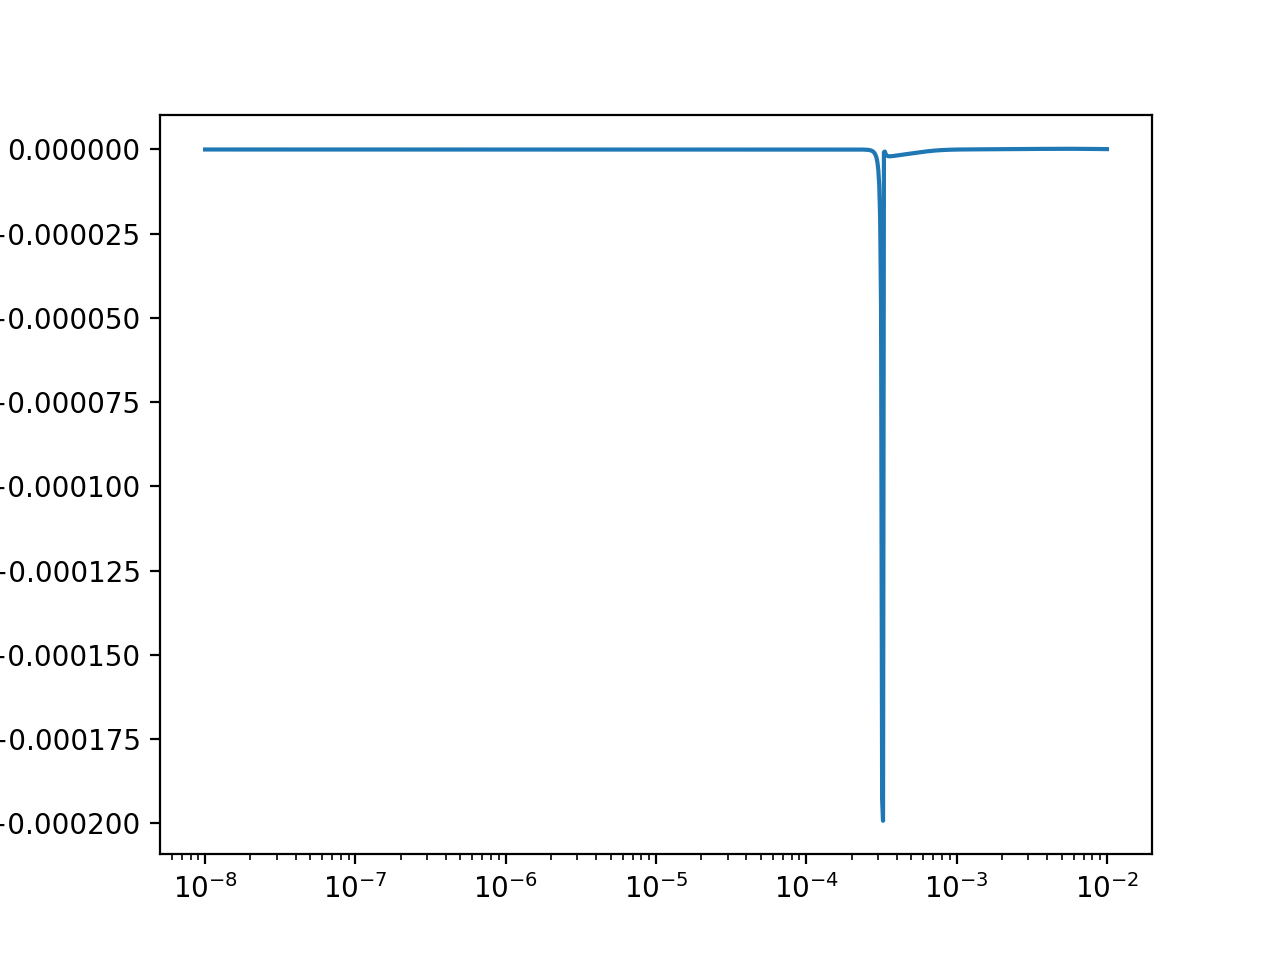

In [5]:
plt.figure()
plt.plot(t, yyDot['H2']*t)
#plt.plot(SPCs['t'], yyDotN, ':')
plt.xscale('log')
#plt.yscale('log')

<IPython.core.display.Javascript object>


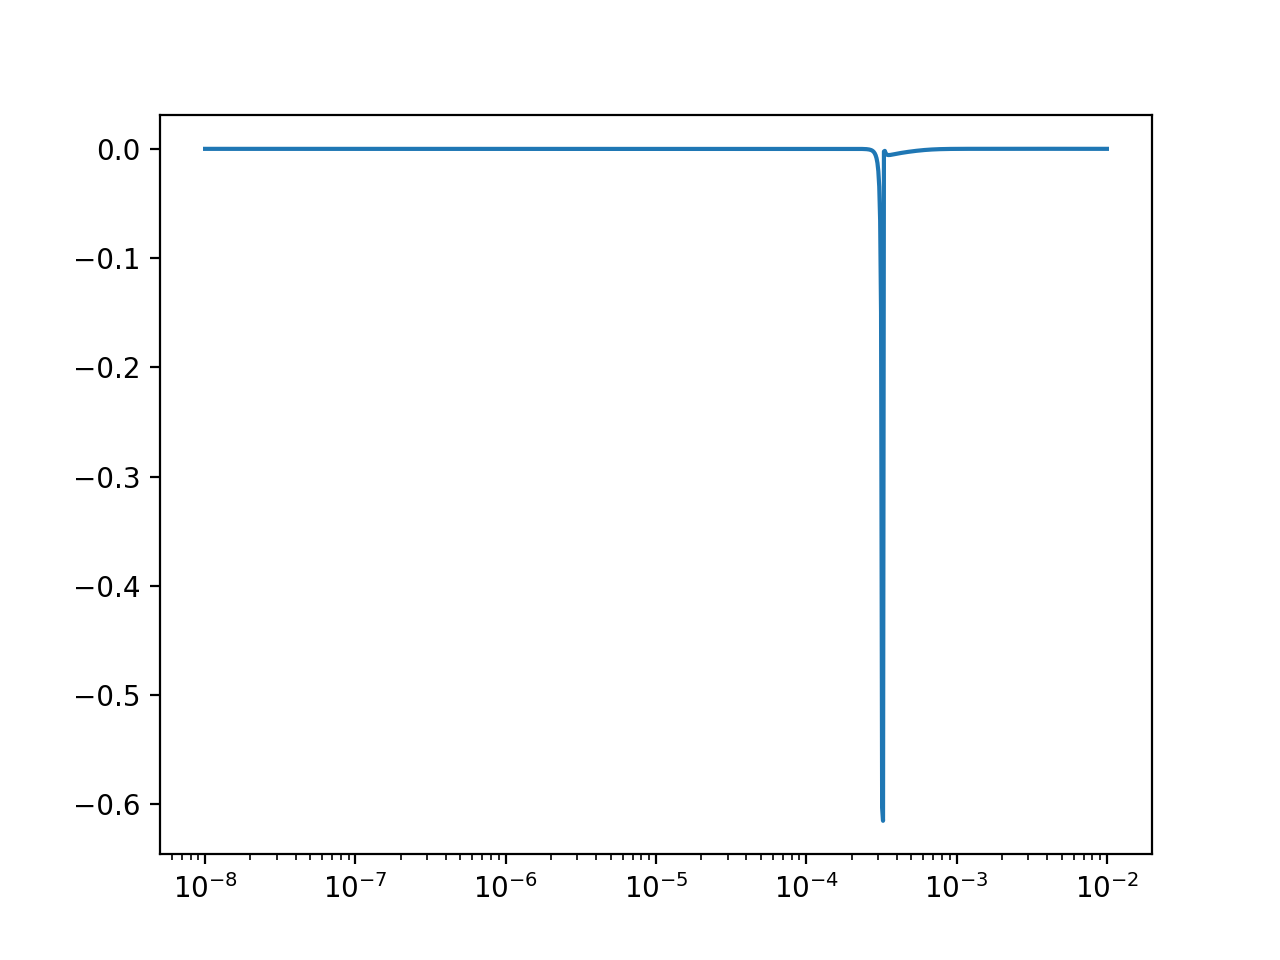

In [6]:
plt.figure()
plt.plot(t, yyDot['H2'])
#plt.plot(SPCs['t'], yyDotN, ':')
plt.xscale('log')
#plt.yscale('log')

In [7]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.1'
PCs      = pd.read_csv(FileName, header=0)

FileName = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/SPC.csv.1'
SPCs     = pd.read_csv(FileName, header=0)

t        = PCs['t'].to_numpy()
PCN      = PCs['PC_5'].to_numpy()

SPCN     = np.gradient(PCN, t)

<IPython.core.display.Javascript object>


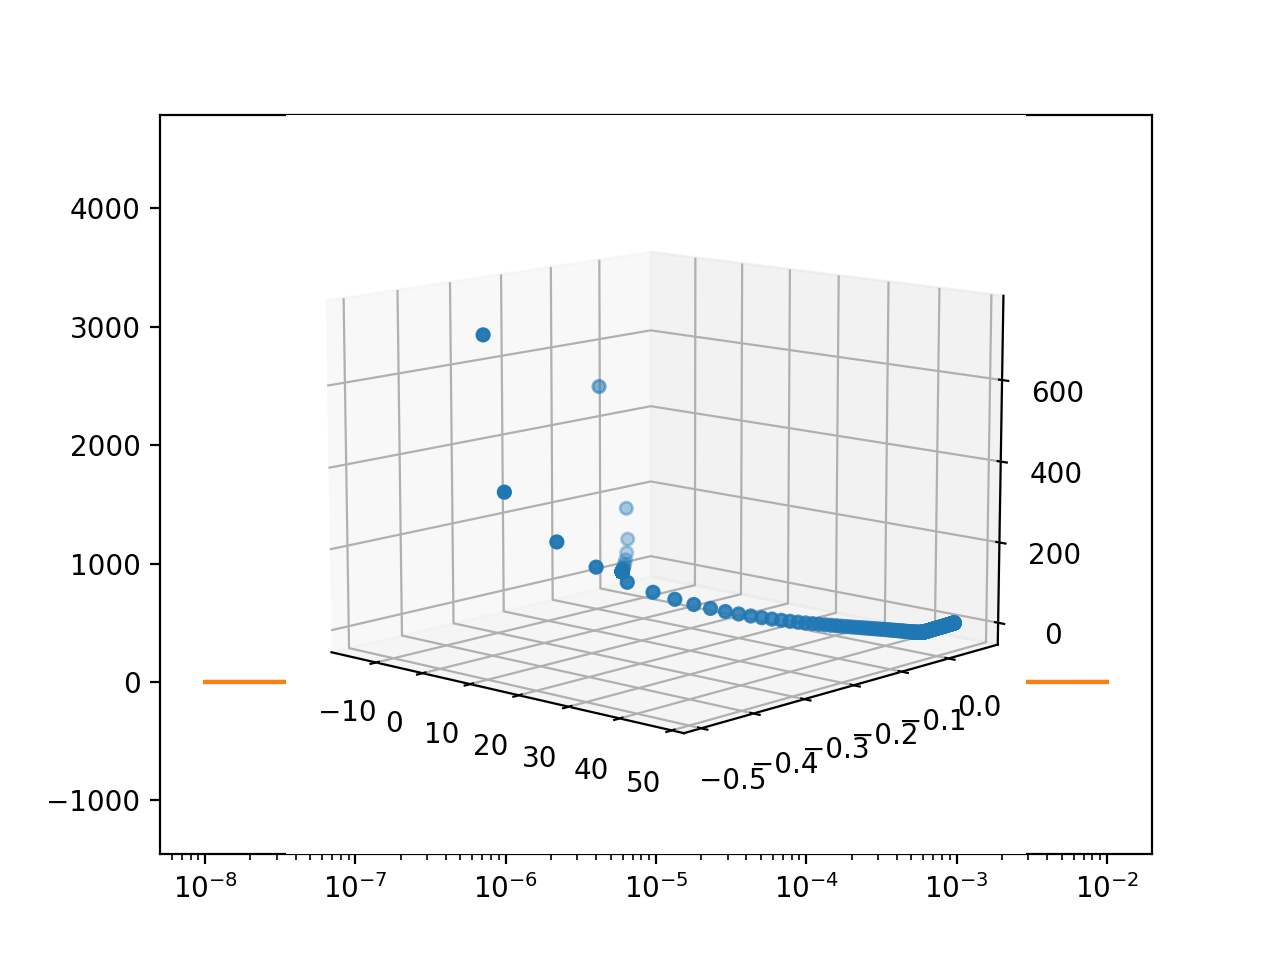

In [8]:
plt.figure()
plt.plot(SPCs['t'], SPCs['SPC_5'])
plt.plot(SPCs['t'], SPCN)
plt.xscale('log')
#plt.yscale('log')

In [9]:
jIC = 0
for iIC in range(n_ics):
    
    FileName = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iIC+1)
    PCsTemp  = pd.read_csv(FileName, header=0)
    
    FileName = OutputDir+'/'+str(NVarsRed)+'PC/train/ext/SPC.csv.'+str(iIC+1)
    SPCsTemp = pd.read_csv(FileName, header=0)

    if jIC == 0:
        PCS  = PCsTemp[Vars]
        SPCS = SPCsTemp[SVars]
    else:
        PCS  = pd.concat([PCS,   PCsTemp[Vars]],  axis=0)
        SPCS = pd.concat([SPCS, SPCsTemp[SVars]], axis=0)
    
    jIC += 1

In [10]:
ax = plt.axes(projection='3d')

ax.scatter(PCs['PC_1'], PCs['PC_2'], SPCs['SPC_1'])
#ax.scatter(PCs.to_numpy()[0:50000,0], PCs.to_numpy()[0:50000,1], SPCs.to_numpy()[0:50000,0])

In [11]:
from sklearn.model_selection import train_test_split

try:
    os.makedirs(OutputDir+'/'+str(NVarsRed)+'PC/train/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(NVarsRed)+'PC/valid/')
except:
    pass

In [12]:
data_id    = 'pts'

n_points             = len(PCs)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=valid_perc/100, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/'+str(NVarsRed)+'PC/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(NVarsRed)+'PC/valid/'+data_id+'/')
except:
    pass

DataInput  = PCs[Vars]
DataInput.iloc[train_idx].to_csv(OutputDir+'/'+str(NVarsRed)+'PC/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/'+str(NVarsRed)+'PC/valid/'+data_id+'/Input.csv', index=False)

DataOutput = SPCs[SVars]
DataOutput.iloc[train_idx].to_csv(OutputDir+'/'+str(NVarsRed)+'PC/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/'+str(NVarsRed)+'PC/valid/'+data_id+'/Output.csv', index=False)